In [39]:
import pandas as pd
import re


In [40]:
def to_dict(line: str):
    dictionary = {}
    list_ = line.split(', ')
    for a in list_:
        dictionary[a.split(':')[0]] = float(a.split(':')[1])
    return dictionary

In [41]:
line = 'MRAE:0.10315303633871832, RMSE: 0.014856707369663606, PSNR:39.92008122151395, SAM: 0.0742529726342151, MRAERGB: 0.05963024839170669, SSIM: 0.994745523678629, PSNRRGB: 45.46460699883293, Delta E: 0.47822787539388556'
d = to_dict(line)
for k, v in d.items():
    print(k, v)

MRAE 0.10315303633871832
RMSE 0.014856707369663606
PSNR 39.92008122151395
SAM 0.0742529726342151
MRAERGB 0.05963024839170669
SSIM 0.994745523678629
PSNRRGB 45.46460699883293
Delta E 0.47822787539388556


In [42]:
datas = {re.compile('ARAD'): False, re.compile('BGU'): False, re.compile('CAVE'): False}

csv_dict = {'ARAD': {}, 'BGU': {}, 'CAVE': {}}
file = '/zhome/02/b/164706/Master_Courses/thesis/HSI-diffusion/result.txt'
f = open(file, 'r')
csv_dict['ARAD']['Models'] = []
csv_dict['BGU']['Models'] = []
csv_dict['CAVE']['Models'] = []
for k in d.keys():
    for k_ in csv_dict.keys():
        csv_dict[k_][k] = []
for line in f.readlines():
    for data in datas.keys():
        if datas[data]:
            for k, v in to_dict(line).items():
                csv_dict[dataname][k].append(v)
            datas[data] = False
        if data.search(line) is not None:
            datas[data] = True
            modelname = line.split('-')[0]
            dataname = str(data.pattern)
            csv_dict[dataname]['Models'].append(modelname)
print(csv_dict)


{'ARAD': {'Models': ['Dual Transformer + Transformer Discriminator + deltaE + pixel shuffle + progressive training without freezing Discriminator', 'Dual Transformer + Transformer Discriminator no_deltaE', 'Dual Transformer + Transformer Discriminator no_sam', 'MSTPlusPlus', 'AWAN', 'HSCNN_Plus', 'Restormer', 'pix2pix'], 'MRAE': [0.08247688794998746, 0.08825937629138168, 0.09284412035424458, 0.10315303633871832, 0.10106753593212679, 0.20368691302443806, 0.10867723528491824, 0.2390598725331457], 'RMSE': [0.011736996437569982, 0.014554361624055002, 0.013417540056827037, 0.014856707369663606, 0.01502863594919051, 0.029860065678918832, 0.016010244773994934, 0.03316663871274183], 'PSNR': [40.85047433305253, 39.26994664323764, 39.77843430317459, 39.92008122151395, 39.34092976015968, 32.041277759006654, 38.843103966227, 30.89312628734506], 'SAM': [0.06724408715963363, 0.07214665897190571, 0.07450517517955679, 0.0742529726342151, 0.07018550885351081, 0.08108491503486508, 0.07544942311942578, 0

In [43]:
with pd.ExcelWriter("model_performance.xlsx") as writer:
    for k in csv_dict.keys():
        df = pd.DataFrame(csv_dict[k])
        df.to_excel(writer, sheet_name=k, index=False)


In [10]:
# import sys
# sys.path.append('./')
import torch
import numpy as np
import scipy.io
import re
from utils import *
# from dataset.datasets import *
from tqdm import tqdm
import os
import colour
from NTIRE2022Util import *
from skimage.metrics import structural_similarity as ssim
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
def gen_color_map(hsi, filename):
    img1 = (np.matmul(hsi[:,:,8:16], CAM_FILTER[8:16,:])) / (np.matmul(hsi[:,:,:8], CAM_FILTER[:8,:])).max()
    plt.figure(figsize=[6, 20])
    title = filename.split('/')[0]
    plt.subplot(4,1,1)
    plt.title(title, fontsize=24)
    plt.imshow(img1)
    plt.axis('off')
    plt.subplot(4,1,2)
    plt.imshow(img1)
    plt.axis('off')
    plt.subplot(4,1,3)
    plt.imshow(img1)
    plt.axis('off')
    plt.subplot(4,1,4)
    plt.imshow(img1)
    plt.axis('off')
    plt.close()

def gen_density(hsi, filename):
    band = np.linspace(400, 700, 31)
    density = hsi.reshape(-1, 31).mean(0)
    plt.plot(band, density, '+-', label='label1')
    # plt.legend()
    # density = hsi.reshape(-1, 31).mean(0)
    # plt.plot(band, density, label='label2')
    # plt.legend()
    # plt.close()

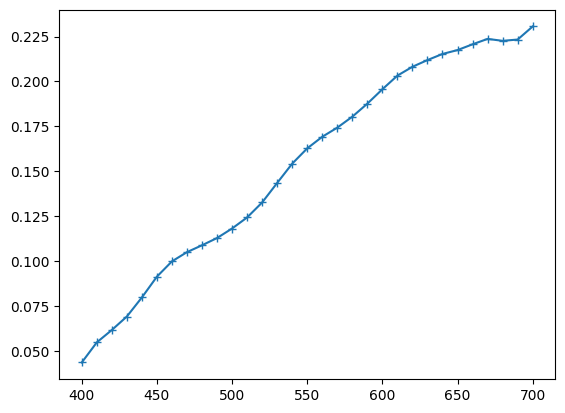

In [61]:
modelname = 'AWAN'
dataname = 'ARAD'
name = '001.mat'
data = 'ARAD'
i = 0

fake_hsi = scipy.io.loadmat(f'/work3/s212645/Spectral_Reconstruction/FakeHyperSpectrum/{modelname}-{dataname}/{name}')['cube']
gen_density(fake_hsi, f'{modelname}/{data}-{i}')

In [1]:
from NTIRE2022Util import *
import numpy as np
import matplotlib.pyplot as plt

rgbfilterpath = 'resources/RGB_Camera_QE.csv'
camera_filter, filterbands = load_rgb_filter(rgbfilterpath)
cube_bands = np.linspace(400,700,301)
index = np.linspace(40, 340, 301)

In [2]:
cam_filter = np.zeros([301, 3])
count = 0
for i in index:
    i = int(i)
    cam_filter[count,:] = camera_filter[i,:] 
    count += 1
CAM_FILTER = cam_filter.astype(np.float32)

(301, 3)


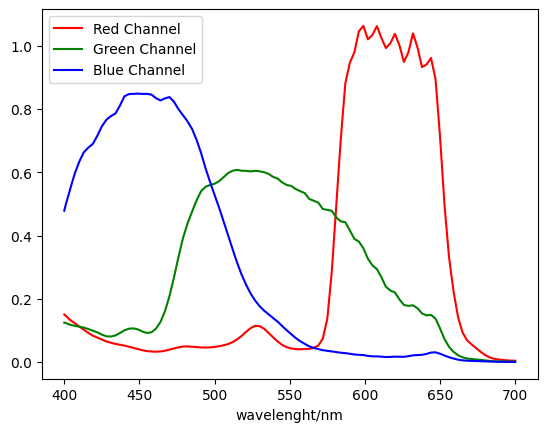

In [9]:
print(CAM_FILTER.shape)
plt.plot(cube_bands, CAM_FILTER[:, 0], color='red', label='Red Channel')
plt.plot(cube_bands, CAM_FILTER[:, 1], color='green', label='Green Channel')
plt.plot(cube_bands, CAM_FILTER[:, 2], color='blue', label='Blue Channel')

plt.xlabel('wavelenght/nm')
plt.legend()

plt.show()